In [10]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale
import pandas as pd
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD, RMSprop
import matplotlib.pyplot as plt

df = pd.read_csv('./data/iris.csv')

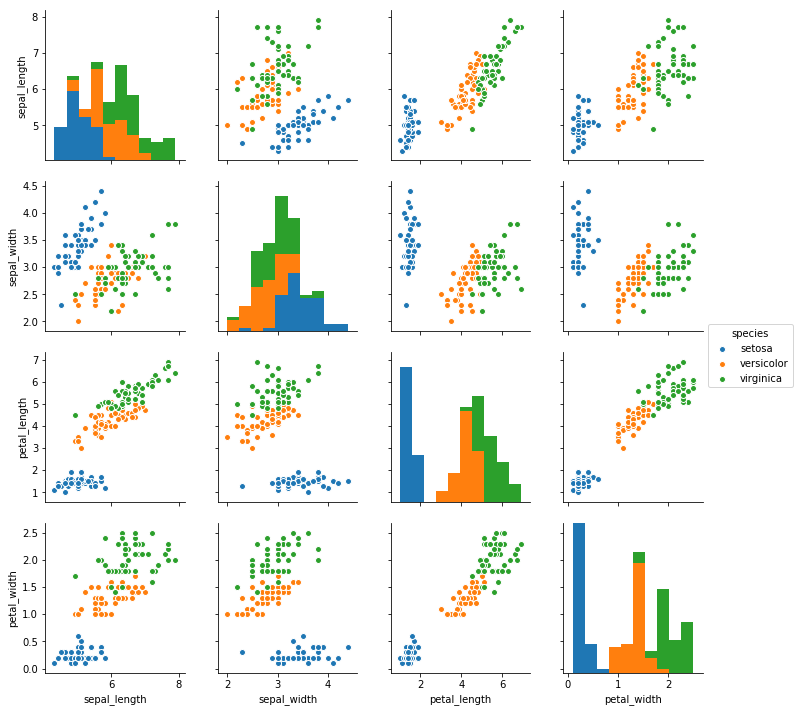

In [11]:
import seaborn as sns
sns.pairplot(df, hue="species")

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()

X = scale(df.drop('species', axis=1).values)
y = df['species'].values

y = encoder.fit_transform(y)

y = pd.get_dummies(y).values

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [16]:
K.clear_session()

model = Sequential()
model.add(Dense(2, input_shape=(4,), activation='relu'))
model.add(Dense(3, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.01),
              metrics=['accuracy'])

h = model.fit(X_train, y_train, batch_size=16, epochs=20,
              verbose=1, validation_split=0.3)
result = model.evaluate(X_test, y_test)

Train on 73 samples, validate on 32 samples
Epoch 1/20
73/73 [==============================] - 1s 9ms/step - loss: 0.9051 - acc: 0.4658 - val_loss: 0.7757 - val_acc: 0.4896
Epoch 2/20
73/73 [==============================] - 0s 198us/step - loss: 0.7906 - acc: 0.4977 - val_loss: 0.7176 - val_acc: 0.5104
Epoch 3/20
73/73 [==============================] - 0s 192us/step - loss: 0.7284 - acc: 0.5114 - val_loss: 0.6762 - val_acc: 0.5417
Epoch 4/20
73/73 [==============================] - 0s 216us/step - loss: 0.6781 - acc: 0.5525 - val_loss: 0.6415 - val_acc: 0.6771
Epoch 5/20
73/73 [==============================] - 0s 211us/step - loss: 0.6336 - acc: 0.6849 - val_loss: 0.6131 - val_acc: 0.6979
Epoch 6/20
73/73 [==============================] - 0s 232us/step - loss: 0.5967 - acc: 0.7352 - val_loss: 0.5911 - val_acc: 0.7083
Epoch 7/20
73/73 [==============================] - 0s 233us/step - loss: 0.5659 - acc: 0.7443 - val_loss: 0.5735 - val_acc: 0.7188
Epoch 8/20
73/73 [================

In [17]:
result

[0.34249076512124804, 0.8074073817994859]

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 9         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.layers

In [20]:
inp = model.layers[0].input
out = model.layers[0].output

In [22]:
inp, out

(<tf.Tensor 'dense_1_input:0' shape=(?, 4) dtype=float32>,
 <tf.Tensor 'dense_1/Relu:0' shape=(?, 2) dtype=float32>)

In [23]:
features_function = K.function([inp], [out])
features_function

In [24]:
features_function([X_test])[0].shape

(45, 2)

In [25]:
features = features_function([X_test])[0]

In [26]:
features[:5]

array([[-0.       , -0.       ],
       [ 4.382711 ,  1.4374377],
       [-0.       , -0.       ],
       [-0.       , -0.       ],
       [-0.       , -0.       ]], dtype=float32)

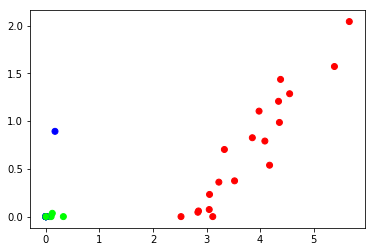

In [27]:
plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')

In [28]:
K.clear_session()

model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.01),
              metrics=['accuracy'])

45/45 [==============================] - 0s 73us/step


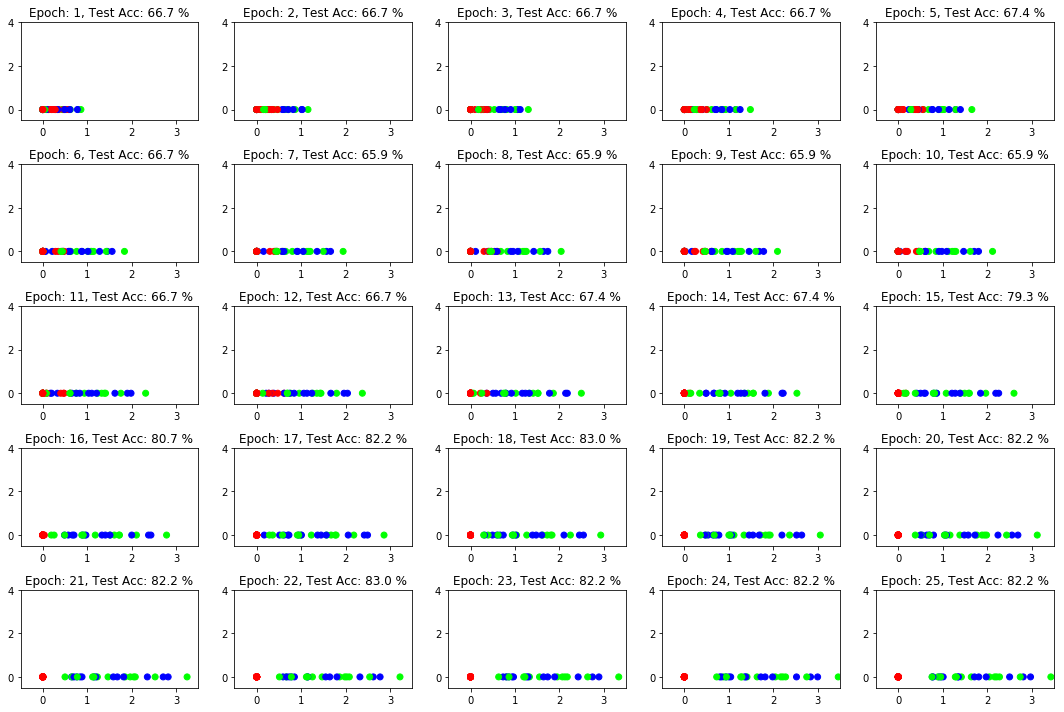

In [29]:
inp = model.layers[0].input
out = model.layers[1].output
features_function = K.function([inp], [out])

plt.figure(figsize=(15,10))

for i in range(1, 26):
    plt.subplot(5, 5, i)
    h = model.fit(X_train, y_train, batch_size=16, epochs=1, verbose=0)
    test_accuracy = model.evaluate(X_test, y_test)[1]
    features = features_function([X_test])[0]
    plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')
    plt.xlim(-0.5, 3.5)
    plt.ylim(-0.5, 4.0)
    plt.title('Epoch: {}, Test Acc: {:3.1f} %'.format(i, test_accuracy * 100.0))

plt.tight_layout()